  **1.Import Libaries**

In [139]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud
from pandas import DataFrame as df

**2.Reading and Exploring the Data
We have 2 datasets.
movies, ratings
Both of which are in csv format.**

In [140]:
#importing movies.csv
movies_df= pd.read_csv('movies.csv')

In [141]:
#dimensionality of movies df
movies_df.shape

(27278, 3)

In [142]:
#top 5 rows of movies_df
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [143]:
#a concise summary of 
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


In [144]:
len(movies_df.index)

27278

In [145]:
# lets explore ratings.CSV
ratings_df=pd.read_csv('ratings.csv',sep=',')

In [146]:
ratings_df.shape

(1048575, 4)

In [147]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [148]:
del ratings_df['timestamp']

In [149]:
#displays first 5 data from a dataframe
#here rating.csv has 4 columns
ratings_df.head() 

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [150]:
#summary of ratings.csv
ratings_df.describe()

,userId,movieId,rating
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00
std,2.018424e+03,1.910014e+04,1.051919e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,1.813000e+03,9.030000e+02,3.000000e+00
50%,3.540000e+03,2.143000e+03,4.000000e+00
75%,5.233000e+03,4.641000e+03,4.000000e+00
max,7.120000e+03,1.306420e+05,5.000000e+00


In [151]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
userId     1048575 non-null int64
movieId    1048575 non-null int64
rating     1048575 non-null float64
dtypes: float64(1), int64(2)
memory usage: 24.0 MB


**3.Cleaning of data**

In [152]:
#is any row null
movies_df.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [153]:
#is any row null there
ratings_df.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

**4.Data Analysis**

In [154]:
#spliting genres
movies_df['genres_arr'] = movies_df['genres'].str.split('|')
movies_df.head()

,movieId,title,genres,genres_arr
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [155]:
del movies_df['genres']

In [156]:
movies_df.head()

,movieId,title,genres_arr
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [157]:
animation_df = movies_df[movies_df.genres_arr.map(lambda x: 'Animation' in x)]
print (len(animation_df.index))


1027


In [158]:
from collections import Counter

flattened_genres = [item for sublist in movies_df.genres_arr for item in sublist]

genre_dict = dict(Counter(flattened_genres))



In [159]:
import pprint
pprint.pprint (genre_dict)

{'(no genres listed)': 246,
 'Action': 3520,
 'Adventure': 2329,
 'Animation': 1027,
 'Children': 1139,
 'Comedy': 8374,
 'Crime': 2939,
 'Documentary': 2471,
 'Drama': 13344,
 'Fantasy': 1412,
 'Film-Noir': 330,
 'Horror': 2611,
 'IMAX': 196,
 'Musical': 1036,
 'Mystery': 1514,
 'Romance': 4127,
 'Sci-Fi': 1743,
 'Thriller': 4178,
 'War': 1194,
 'Western': 676}


In [160]:
#minimum rating given to a movie
min_rate=ratings_df['rating'].min()
min_rate

0.5

In [161]:
#min_rate_df=ratings_df.loc[ratings_df['rating'] == min_rate]

In [162]:
#maximum rating given to a movie
max_rate=ratings_df['rating'].max()
max_rate

5.0

**We will merge the two datasets movies and rating**

In [163]:
#merging two dataframes "movies.csv" and "ratings.csv"
movie_df_ratings_df=movies_df.merge(ratings_df,on = 'movieId',how = 'inner')
movie_df_ratings_df.head(3)

,movieId,title,genres_arr,userId,rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3,4.0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",6,5.0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",8,4.0


In [164]:
len(movie_df_ratings_df)

1048575

In [165]:
# now lets find the titles of the top 10 movies to see if we are missing on some awesome movies!
titles_df = movie_df_ratings_df[['movieId', 'title', 'rating']]
titles_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,title,rating
12789,95218,First Position (2011),5.0
1607,1706,Tar (1996),5.0
6859,7330,Tokyo Joe (1949),5.0
130,134,Sonic Outlaws (1995),5.0
10461,60227,"Unholy Three, The (1925)",5.0
7528,8698,"Comfort of Strangers, The (1990)",5.0
7519,8686,Morituri (1965),5.0
10449,60096,Ten Minutes Older: The Trumpet (2002),5.0
13548,108501,Justice League: War (2014),5.0
7118,7878,Straight to Hell (1987),5.0


In [166]:
# these movies are not what we expected to be in the Top 10 movies list, something's wrong here
# lets check how many ratings have these movies received, lets take an example of movieId 163949
len(movie_df_ratings_df[movie_df_ratings_df['movieId'] == 1706].index) # 163949

1

In [167]:
# now lets only consider movies which have atleast 100 ratings and see how the top 10 movies change
temp_df = titles_df.groupby(['movieId', 'title'], as_index=False).count()
well_rated_df = temp_df[temp_df['rating'] > 100].sort_values(by='rating', ascending=False)
well_rated_df.head()

,movieId,title,rating
290,296,Pulp Fiction (1994),3498
349,356,Forrest Gump (1994),3476
581,593,"Silence of the Lambs, The (1991)",3247
312,318,"Shawshank Redemption, The (1994)",3216
470,480,Jurassic Park (1993),3129


In [169]:
# now lets created a filtered df from merged_df which only has these movies and then find top 20 movies
filtered_df = movie_df_ratings_df[movie_df_ratings_df['movieId'].apply(lambda x: x in list(well_rated_df['movieId']))]
titles_df = filtered_df[['title', 'rating', 'movieId']]
titles_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(20)

,movieId,title,rating
177,318,"Shawshank Redemption, The (1994)",4.469994
384,858,"Godfather, The (1972)",4.388161
39,50,"Usual Suspects, The (1995)",4.370482
1813,7502,Band of Brothers (2001),4.353070
1344,3429,Creature Comforts (1989),4.311475
277,527,Schindler's List (1993),4.295612
550,1221,"Godfather: Part II, The (1974)",4.278561
401,912,Casablanca (1942),4.268721
1320,3307,City Lights (1931),4.261029
1703,6016,City of God (Cidade de Deus) (2002),4.258514


In [170]:
#displays high rated movies
high_rated= movie_df_ratings_df['rating']>4.0
movie_df_ratings_df[high_rated].head(10)

,movieId,title,genres_arr,userId,rating
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",6,5.0
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",11,4.5
7,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",14,4.5
9,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",19,5.0
14,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",34,5.0
15,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",39,5.0
19,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",58,5.0
20,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",59,4.5
24,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",82,5.0
25,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",84,5.0


In [171]:
# displays low rated movies
low_rated = movie_df_ratings_df['rating']<1.0
movie_df_ratings_df[low_rated].head()

,movieId,title,genres_arr,userId,rating
737,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",2056,0.5
749,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",2084,0.5
795,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",2202,0.5
859,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",2362,0.5
1783,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",4869,0.5


In [172]:
#top 25 most rated movies
most_rated = movie_df_ratings_df.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
Pulp Fiction (1994)                                                               3498
Forrest Gump (1994)                                                               3476
Silence of the Lambs, The (1991)                                                  3247
Shawshank Redemption, The (1994)                                                  3216
Jurassic Park (1993)                                                              3129
Star Wars: Episode IV - A New Hope (1977)                                         2874
Braveheart (1995)                                                                 2799
Terminator 2: Judgment Day (1991)                                                 2711
Matrix, The (1999)                                                                2705
Schindler's List (1993)                                                           2598
Toy Story (1995)                                                                  2569
Fugitive, The (1993)                 

In [173]:
#slicing out columns to display only title and genres columns from movies.csv
movies_df[['title','genres_arr']].head()

,title,genres_arr
0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,Grumpier Old Men (1995),"[Comedy, Romance]"
3,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,Father of the Bride Part II (1995),[Comedy]


**5.Data Visualization**

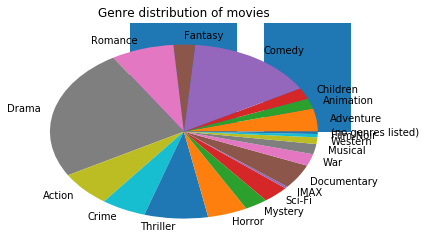

In [174]:
plt.pie(genre_dict.values(), labels=genre_dict.keys())
plt.title('Genre distribution of movies')
plt.show()

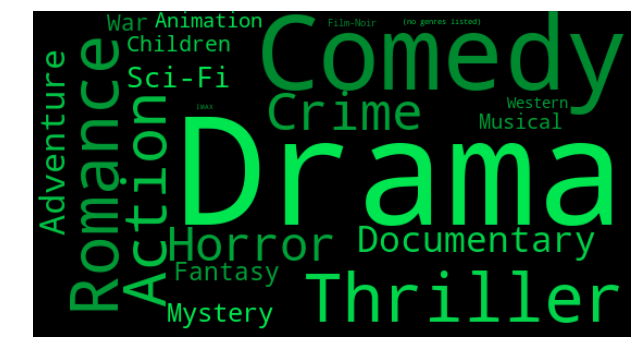

In [175]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
tone = 100

f, ax = plt.subplots(figsize=(14, 6))

wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)

wordcloud.generate_from_frequencies(genre_dict)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [176]:
counter_lambda = lambda x: len(x)
movies_df['genre_count'] = movies_df.genres_arr.apply(counter_lambda)
movies_df.head()

,movieId,title,genres_arr,genre_count
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),[Comedy],1


In [177]:
x = list(range(len(genre_dict)))
plt.xticks(x, genre_dict.keys(), rotation=80)
plt.bar(x, genre_dict.values())
plt.grid()
plt.plot()

[]

**For Dash UI**

In [178]:
# here we extract year from title
movies_df['year'] =movies_df['title'].str.extract('.*\((.*)\).*',expand = False)
movies_df.head(5)

,movieId,title,genres_arr,genre_count,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",3,1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",2,1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",3,1995
4,5,Father of the Bride Part II (1995),[Comedy],1,1995


In [179]:
def explode(df, columns):
    idx = np.repeat(df.index, df[columns[0]].str.len())
    a = df.T.reindex_axis(columns).values
    concat = np.concatenate([np.concatenate(a[i]) for i in range(a.shape[0])])
    p = pd.DataFrame(concat.reshape(a.shape[0], -1).T, idx, columns)
    return pd.concat([df.drop(columns, axis=1), p], axis=1).reset_index(drop=True)

In [180]:
movies_df= explode(movies_df, ['genres_arr'])
movies_df.head()

,movieId,title,genre_count,year,genres_arr
0,1,Toy Story (1995),5,1995,Adventure
1,1,Toy Story (1995),5,1995,Animation
2,1,Toy Story (1995),5,1995,Children
3,1,Toy Story (1995),5,1995,Comedy
4,1,Toy Story (1995),5,1995,Fantasy


In [181]:
merged_df=movies_df.merge(ratings_df,on = 'movieId',how = 'inner')

In [182]:
merged_df.head()

,movieId,title,genre_count,year,genres_arr,userId,rating
0,1,Toy Story (1995),5,1995,Adventure,3,4.0
1,1,Toy Story (1995),5,1995,Adventure,6,5.0
2,1,Toy Story (1995),5,1995,Adventure,8,4.0
3,1,Toy Story (1995),5,1995,Adventure,10,4.0
4,1,Toy Story (1995),5,1995,Adventure,11,4.5


In [52]:
merged_df.to_csv("merged.csv",sep=',', encoding='utf-8')